# Лабораторная работа 213: Гармонический анализ сигналов

In [1]:
import numpy as np
import matplotlib.pyplot as polt 
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

In [20]:
str_index = ["Меандр, В", "C1, В", "C2, В", "C3, В"]
# здесь пишем гармоники соответствующим квадратным сигналам с соответствующими скважностями
# каждая n гармоника пропадает
A_proc_50 = np.array([0.4497, 0.1281, 0.07473, 0.05338, 0.03915, 0.02491])#, 0.05338, 0.03915, 0.02491])
A_proc_33 = np.array([0.3683, 0.3737, 0, 0.2135, 0.07651, 0 ])#, 0.06408, 0.04093])
A_proc_25 = np.array([0.5214, 0.3043, 0.2117, 0, 0.09786, 0.04804]) #, 0.05872]) 

odd_numbers = np.array([2*i + 1 for i in range(0, 6)])
even_numbers = np.array([2*i for i in range(1, 7)])
numbers = np.array([i for i in range (1, 7)])

# Расчет коэф. C 

$C_{fur-th} = \frac{sin(\tau \pi n/T)}{n}$, где
* $n$ - номер гармоники
* $\frac{T}{\tau}$ - скважность

$C_{fur-pr} = \frac{A}{A_0}$

### Скважность = 2 (50%)

In [30]:
A0 = np.mean([480.4, 476.9 , 494.7, 498.2])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.5*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_50 / A_proc_50[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=odd_numbers)
df

,1,3,5,7,9,11
C_th,1.0,0.333333,0.200000,0.142857,0.111111,0.090909
C_pr,1.0,0.000000,0.292666,0.000000,0.170733,0.000000




### Скважность = 3 (33%)


In [3]:
A0 = np.mean([477, 484, 498.2, 505.3])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.33*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_33 / A_proc_33[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.860742,0.010470,0.178201,0.118154,0.010456,0.083432
C_pr,1.000000,1.014662,0.000000,0.579690,0.207738,0.000000


### Скважность = 4 (25%)

In [4]:
A0 = np.mean([473.3, 480.4, 491, 501.8])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.25*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_25 / A_proc_25[0] # (A0)
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.707107,0.235702,0.141421,0.101015,0.078567,0.064282
C_pr,1.000000,0.583621,0.406022,0.000000,0.187687,0.092137


# Расчет коэф. $\alpha$


$\alpha_{th}=\frac{1}{\sqrt{1+(\omega C R)^2}}$

$\alpha_{pr}=\frac{A}{A_0}$

In [21]:
nu = np.array([16020, 47970, 79910, 112000, 144000, 176100])
omega = 2*np.pi*nu

R = 10000
C1 = 100 * 10**(-12)
C2 = 200 * 10**(-12)
C3 = 530 * 10**(-12)

c1 = np.array([0.4404, 0.12, 0.064, 0.04037, 0.02713, 0.01623])
c2 = np.array([0.4235, 0.1085, 0.0427, 0.02669, 0.01423, 0.00768])
c3 = np.array([0.3701, 0.06228, 0.02135, 0.01246, 0.007897, 0.003559 ])

In [ ]:
A0 = np.mean([975.1, 989.3, 982.2, 966])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C1*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C1*R)**2)**0.5)/alpha_norm
alpha_pr = c1 / A_proc_50 

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df


,1,2,3,4,5,6
alpha_th,1.00000,0.962294,0.898195,0.821934,0.745277,0.673899
alpha_pr,0.97932,0.936768,0.856416,0.756276,0.692976,0.651546


In [25]:
A0 = np.mean([960, 989.3, 982.2, 968])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C2*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C2*R)**2)**0.5)/alpha_norm
alpha_pr = c2 / A_proc_50 # (A0)

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,1.000000,0.873612,0.719787,0.59082,0.493383,0.420056
alpha_pr,0.941739,0.846995,0.571390,0.50000,0.363474,0.308310


In [26]:
A0 = np.mean([975.1, 989.3, 989.3, 960])*10**(-3) # среднее по квадрату

alpha_norm = 1/((1+(omega*C3*R)**2)**0.5)[0]
alpha_th = 1/((1+(omega*C3*R)**2)**0.5)/alpha_norm
alpha_pr = c3 / A_proc_50 # (A0)

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,1.000000,0.601393,0.398697,0.293519,0.231378,0.190522
alpha_pr,0.822993,0.486183,0.285695,0.233421,0.201711,0.142874


In [29]:
nu = np.array([16, 48, 80, 112 , 144, 176])
str_nu = [str(i)+" кГц" for i in nu]

# Вычисление коэффициентов пропускания

### Первые 6 гармоник для меандра, прошедшего через различные фильтры

In [30]:
df = pd.DataFrame([A_proc_50, c1, c2, c3], index=str_index, columns=str_nu)
df

,16 кГц,48 кГц,80 кГц,112 кГц,144 кГц,176 кГц
"Меандр, В",0.4497,0.12810,0.07473,0.05338,0.039150,0.024910
"C1, В",0.4404,0.12000,0.06400,0.04037,0.027130,0.016230
"C2, В",0.4235,0.10850,0.04270,0.02669,0.014230,0.007680
"C3, В",0.3701,0.06228,0.02135,0.01246,0.007897,0.003559


### Коэффициенты пропускания для разных фильтров

In [31]:
a  = np.array([c1, c2, c3])/A_proc_50[0]
df = pd.DataFrame(np.round(a,2), index=str_index[1:], columns = str_nu)
df

,16 кГц,48 кГц,80 кГц,112 кГц,144 кГц,176 кГц
"C1, В",0.98,0.27,0.14,0.09,0.06,0.04
"C2, В",0.94,0.24,0.09,0.06,0.03,0.02
"C3, В",0.82,0.14,0.05,0.03,0.02,0.01


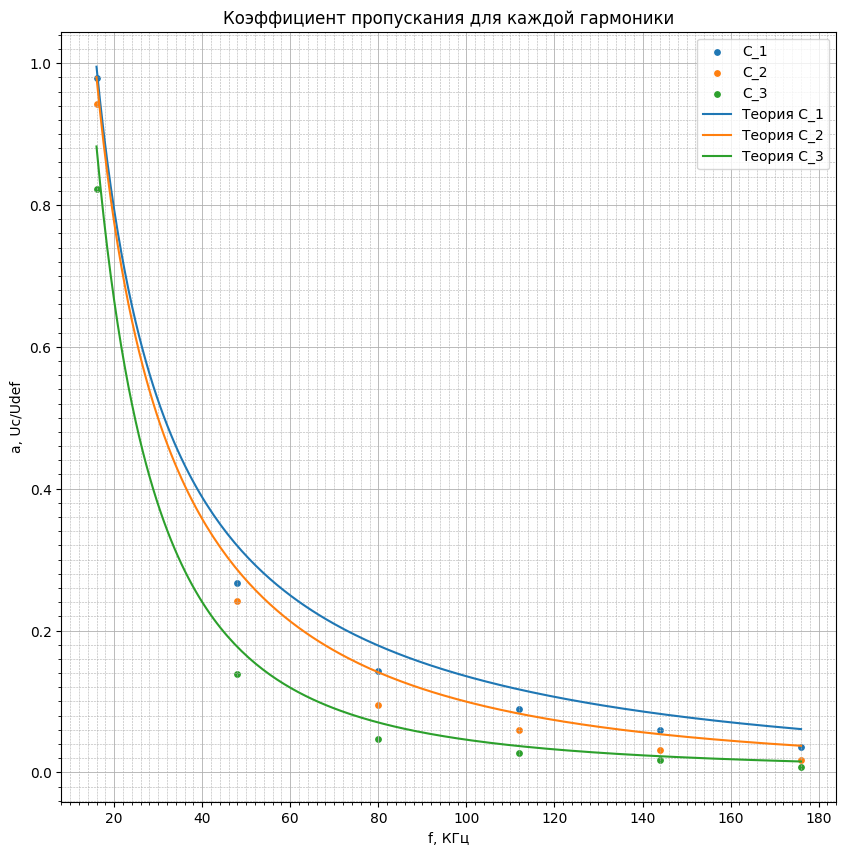

In [32]:
fig, axs = polt.subplots(1,1, figsize = (10,10))
start: int = nu[0]
end: int = nu[-1]
x = np.linspace(start, end, 200)

axs.set_title("Коэффициент пропускания для каждой гармоники")
axs.set_xlabel("f, КГц")
axs.set_ylabel("a, Uc/Udef")

labels_th = [f"Теория C_{i + 1}" for i in range(3)]
labels_pr = [f"C_{i + 1}" for i in range(3)]

# EXPERIMENT
for i in range(3):
    axs.scatter(nu, a[i], s = 15, label=labels_pr[i])

# THEORY
for i in range(3):
    axs.plot(x, start/x * (1 + (2 * np.pi * x * np.array([C1, C2, C3])[i] * R * 10**3)**2)**(-0.5), 
             label=labels_th[i])

axs.legend()
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
polt.grid(which = 'major', linewidth = 0.6)